---------------- 1a ----------------
Test data set average precision:
[ 0.63034759  0.69768935  0.64402619  0.72222222  0.82921512]

Test data set average recall:
[ 0.60551948  0.671875    0.59821429  0.6875      0.76215278]

Test data set average fscore:
[ 0.5950938   0.66773535  0.57394257  0.6827262   0.76217054]

---------------- 1b ----------------
Test data set average precision:
[ 0.68188406  0.75        0.62066752  0.72222222  0.7434593 ]

Test data set average recall:
[ 0.63582251  0.72321429  0.60491071  0.66741071  0.69386574]

Test data set average fscore:
[ 0.62290256  0.72222222  0.5977849   0.65569314  0.68899225]

---------------- 2 ----------------
('tfidf__stop_words', ': ', None)
('tfidf__min_df', ': ', 3)
('clf__alpha', ': ', 0.5)
('best f1 score:', 0.74038261618491519)

---------------- 3 ----------------


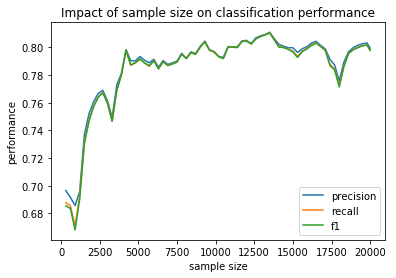

In [10]:
import nltk, re, string, csv
import numpy as np 
from sklearn.preprocessing import normalize
from nltk.corpus import stopwords
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn import svm

# Experiment 1: Compare the performance of classifiers with/without lemmatization.
# Write a block of code to create two MultinomialNB classifiers with 5-folder cross-validation using tf-idf matrixes generated by two different approaches:

#-------------------- tfidf code from assignment 3 ---------------------#
def get_wordnet_pos(pos_tag):
    
    # if pos tag starts with 'J'
    if pos_tag.startswith('J'):
        # return wordnet tag "ADJ"
        return wordnet.ADJ
    
    # if pos tag starts with 'V'
    elif pos_tag.startswith('V'):
        # return wordnet tag "VERB"
        return wordnet.VERB
    
    # if pos tag starts with 'N'
    elif pos_tag.startswith('N'):
        # return wordnet tag "NOUN"
        return wordnet.NOUN
    
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        # be default, return wordnet tag "NOUN"
        return wordnet.NOUN

def get_doc_tokens(doc, lemmatized=False):
    stop_words = stopwords.words('english')
    tokens=[token.strip() \
            for token in nltk.word_tokenize(doc.lower()) \
            if token.strip() not in stop_words and\
               token.strip() not in string.punctuation]
    
    if(lemmatized==True):
        wordnet_lemmatizer = WordNetLemmatizer()
        tagged_tokens= nltk.pos_tag(tokens)
        le_words=[wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) \
            for (word, tag) in tagged_tokens \
            if word not in stop_words and \
            word not in string.punctuation]
        tokens = le_words
    return tokens

def tfidf(docs):
    docs_tokens=[get_doc_tokens(doc, True) for doc in docs]
    voc=list(set([token for tokens in docs_tokens \
              for token in tokens]))

    dtm=np.zeros((len(docs), len(voc)))

    for row_index,tokens in enumerate(docs_tokens):
        for token in tokens:
            col_index=voc.index(token)
            dtm[row_index, col_index]+=1
    doc_len=dtm.sum(axis=1, keepdims=True)
    tf=np.divide(dtm, doc_len)
    doc_freq=np.copy(dtm)
    doc_freq[np.where(doc_freq>0)]=1
    smoothed_idf=np.log(np.divide(len(docs)+1, np.sum(doc_freq, axis=0)+1))+1
    smoothed_tf_idf=normalize(tf*smoothed_idf)
    
    return smoothed_tf_idf

#-------------------- tfidf code from assignment 3 ---------------------#

def experiment1():
    # import cross validation method
    metrics = ['precision_macro', 'recall_macro', "f1_macro"]
    # a) Use TfidfVectorizer from sklearn package with stop words removed option to generate tf-idf matrix.
    dtm = tfidf_vect.fit_transform(text)
    
    # b) Use your solution to Assignment 3(b) to create a tf-idf matrix with lemmatization option set to True.
    smoothed_tf_idf = tfidf(text);

    # Compare the performance of each classifier using the average macro precision and recall over the 5 folders, and write your analysis in a document.
    cv1 = cross_validate(clf, dtm, target, scoring=metrics, cv=5)
    print("---------------- 1a ----------------")
    print("Test data set average precision:")
    print(cv1['test_precision_macro'])
    print("\nTest data set average recall:")
    print(cv1['test_recall_macro'])
    print("\nTest data set average fscore:")
    print(cv1['test_f1_macro'])
    
    cv2 = cross_validate(clf, smoothed_tf_idf, target, scoring=metrics, cv=5)
    print("\n---------------- 1b ----------------")
    print("Test data set average precision:")
    print(cv2['test_precision_macro'])
    print("\nTest data set average recall:")
    print(cv2['test_recall_macro'])
    print("\nTest data set average fscore:")
    print(cv2['test_f1_macro'])
    
    return
    
# Experiment 2: Tune parameters using grid search

# Write a block of code to tune the classifier you created in Step 2(a) using grid search. The grid search is to find best values for the following parameters:
# • stop_words: [None,"english"]
# • min_df: [1,2,3]
# • alpha: [0.5,1.0,1.5,2.0]
# With the best parameter returned from grid search, use them to train a classifier with 5-folder cross-validation, and report the average macro performance metrics over each fold. Compare the performance with the classifier in Step 2(a) and write your conclusion in the document

def experiment2():
    text_clf = Pipeline([('tfidf', tfidf_vect),
                     ('clf', clf)
                   ])
    parameters = {'tfidf__min_df':[1,2,3],
              'tfidf__stop_words':[None,"english"],
              'clf__alpha': [0.5,1.0,1.5,2.0],
    }
    metric =  "f1_macro"
    gs_clf = GridSearchCV(text_clf, param_grid=parameters, scoring=metric, cv=5)
    gs_clf = gs_clf.fit(text, target)
    print("\n---------------- 2 ----------------")
    for param_name in gs_clf.best_params_:
        print(param_name,": ",gs_clf.best_params_[param_name])

    print("best f1 score:", gs_clf.best_score_)
    
    return

# Experiment 3: How many samples are enough? Show the impact of sample size on classifier performance
# Download “amazon_review_large.csv” which contains 20,000 reviews. Starting with 300 samples, in each round you build a classifier with 300 more samples. i.e. in round 1, you use samples from 0:300, and in round 2, you use samples from 0:600, ..., until you use all samples. In each round, do the following:
# a. create tf-idf matrix using TfidfVectorizer with stop words removed
# b. train the classifier using linearSVC model with 10-fold cross validation
# c. collect the macro precision/recall/f1 metrics for each fold and take the average of the
# 10 fold
# Draw a line chart show the relationship between sample size and each average performance metric (reference code provided below). Write your analysis on how sample size affects classification performance in the document

def experiment3():
    text1 = []
    target1 = []
    with open("amazon_review_large.csv", "r") as f:
        reader=csv.reader(f, delimiter=',') 
        for row in reader:
            target1.append(row[0])
            text1.append(row[1])
    m = ['precision_macro', 'recall_macro', "f1_macro"]
    clf = svm.LinearSVC()

    count = 0
    print("\n---------------- 3 ----------------")
    metrics = [];
    i=0
    
    while count < 20000:
        count = count + 300
        if count > 20000:
            count = 20000
        text_sub = text1[0:count]
        target_sub = target1[0:count]
        dtm = tfidf_vect.fit_transform(text_sub)
        cv = cross_validate(clf, dtm, target_sub, scoring=m, cv=10)
        v1 = float(sum(cv['test_precision_macro'])) / len(cv['test_precision_macro'])
        v2 = float(sum(cv['test_recall_macro'])) / len(cv['test_recall_macro'])
        v3 = float(sum(cv['test_f1_macro'])) / len(cv['test_f1_macro'])
        metrics.append((count, v1, v2, v3))
#         print("Test data set average precision:")
#         print(cv['test_precision_macro'])
#         print("\nTest data set average recall:")
#         print(cv['test_recall_macro'])
#         print("\nTest data set average fscore:")
#         print(cv['test_f1_macro'])
        
    # metrics is a list of list, e.g. [[300, 0.7, 0.7,0.7],
    # [600, 0.78, 0.73,0.74], ...]
    results=np.array(metrics)
    plt.plot(results[:,0], results[:,1], '-', label='precision')
    plt.plot(results[:,0], results[:,2], '-', label='recall')
    plt.plot(results[:,0], results[:,3], '-', label='f1')
    plt.title('Impact of sample size on classification performance')
    plt.ylabel('performance')
    plt.xlabel('sample size')
    plt.legend()
    plt.show()
    return 


# MAIN BLOCK
if __name__ == "__main__":
    text = []
    target = []
    with open("amazon_review_300.csv", "r") as f:
        reader=csv.reader(f, delimiter=',') 
        for row in reader:
            target.append(row[0])
            text.append(row[2])
    tfidf_vect = TfidfVectorizer(stop_words="english") 
    clf = MultinomialNB()
    experiment1()
    experiment2()
    experiment3()

    